<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Correlation**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis (EDA). You will examine the distribution of the data, identify outliers, and determine the correlation between different columns in the dataset.


## Objectives


In this lab, you will perform the following:


- Identify the distribution of compensation data in the dataset.

- Remove outliers to refine the dataset.

- Identify correlations between various features in the dataset.


## Hands on Lab


##### Step 1: Install and Import Required Libraries


In [1]:
# Install the necessary libraries
!pip install pandas
!pip install matplotlib
!pip install seaborn

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML, display


### Step 2: Load the Dataset


In [2]:
# Load the dataset from the given URL
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

# Display the first few rows to understand the structure of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 3: Analyze and Visualize Compensation Distribution</h3>


**Task**: Plot the distribution and histogram for `ConvertedCompYearly` to examine the spread of yearly compensation among respondents.


In [11]:
## Write your code here
def visualize_ConvertedCompYearly_distribution(df):
    """
    Creates comprehensive visualization of industry distribution
    """
    # Calculate industry distribution
    CompYearly_dist = df['ConvertedCompYearly'].value_counts()
    
    # Display statistical summary
    html_content = f"""
    <style>
        .industry-stats {{
            margin: 20px;
            padding: 15px;
            background-color: black;
            border-radius: 8px;
            font-family: Arial, sans-serif;
        }}
        .highlight {{
            color: #1976D2;
            font-weight: bold;
        }}
    </style>
    
    <div class='industry-stats'>
        <h3>CompYearly Distribution Insights</h3>
        <p>Total CompYearly: <span class='highlight'>{len(CompYearly_dist)}</span></p>
        <p>Top CompYearly: <span class='highlight'>{CompYearly_dist.index[0]}</span></p>
        <p>Top CompYearly Count: <span class='highlight'>{CompYearly_dist.values[0]:,}</span></p>
        <p>Percentage in Top CompYearly: <span class='highlight'>{(CompYearly_dist.values[0]/len(df)*100):.1f}%</span></p>
    </div>
    """
    
    display(HTML(html_content))
    return CompYearly_dist

# Execute visualization
CompYearly_insights = visualize_ConvertedCompYearly_distribution(df)

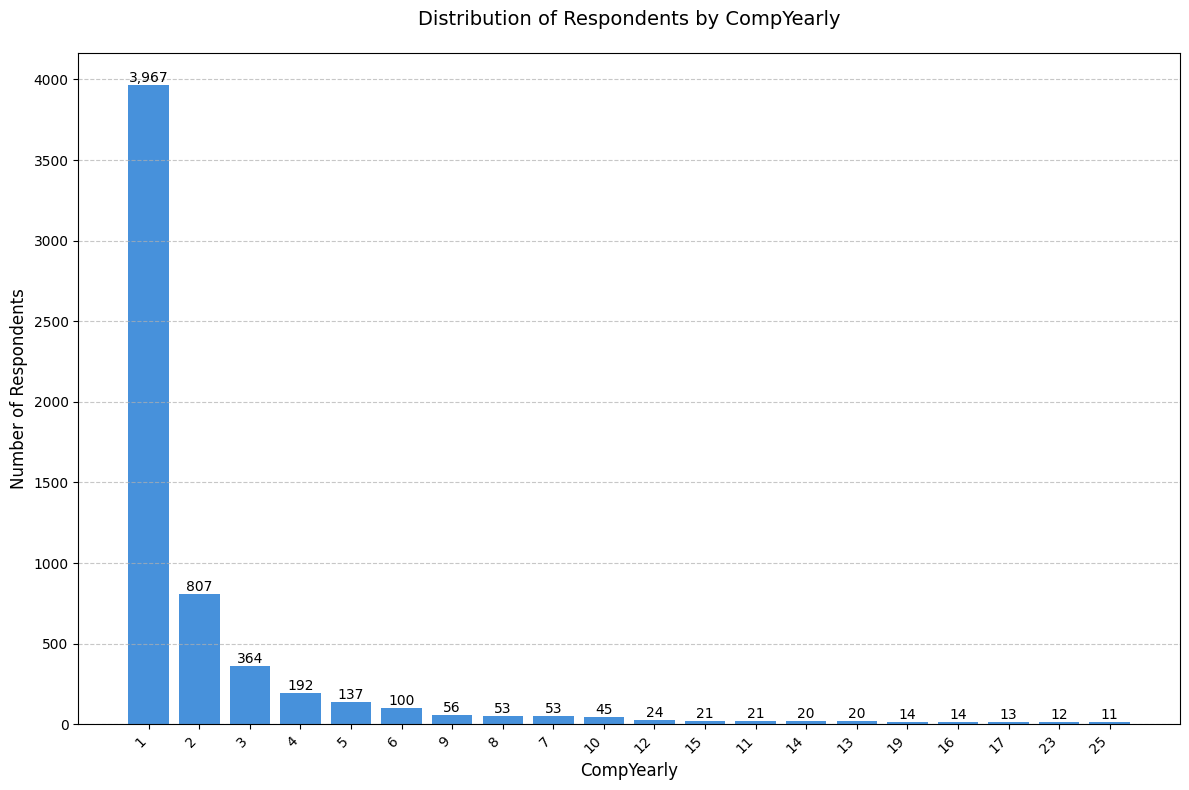

In [15]:
  # Create main bar plot
CompYearly_dist=CompYearly_insights.value_counts(ascending=False).head(20)
plt.figure(figsize=(12, 8))
bars = plt.bar(
        range(len(CompYearly_dist)),
        CompYearly_dist.values,
        color='#1976D2',
        alpha=0.8
    )
    
    # Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(
            bar.get_x() + bar.get_width()/2.,
            height,
            f'{int(height):,}',
            ha='center',
            va='bottom'
        )
    
    # Customize plot
plt.title('Distribution of Respondents by CompYearly', pad=20, fontsize=14)
plt.xlabel('CompYearly', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)
plt.xticks(range(len(CompYearly_dist)), CompYearly_dist.index, rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<h3>Step 4: Calculate Median Compensation for Full-Time Employees</h3>


**Task**: Filter the data to calculate the median compensation for respondents whose employment status is "Employed, full-time."


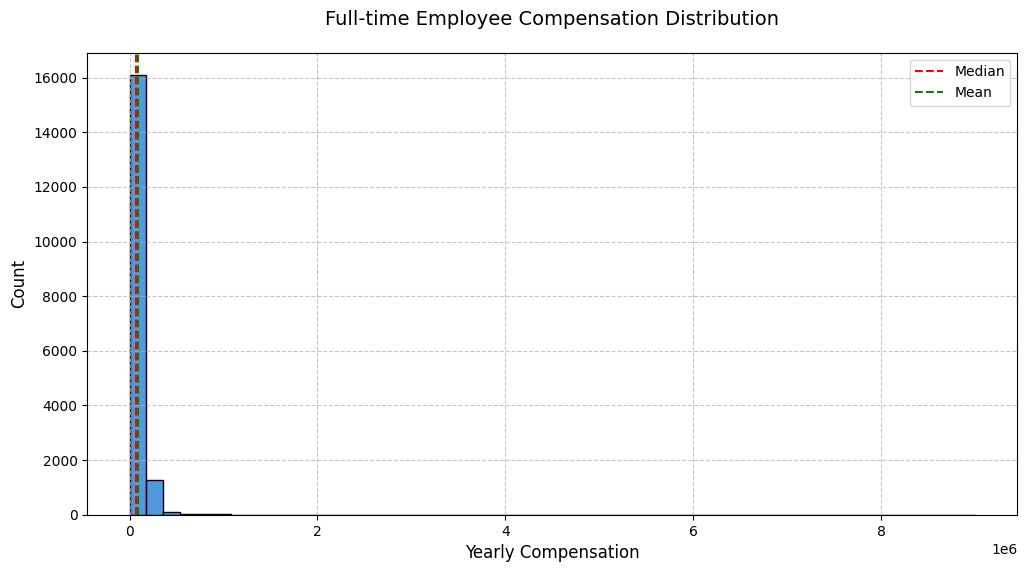

In [20]:
## Write your code here
filtered_df = df[df['Employment'] == 'Employed, full-time']['ConvertedCompYearly'].median()
filtered_df
def analyze_fulltime_compensation(df):
    """
    Analyzes compensation for full-time employees
    """
    # Filter for full-time employees
    fulltime_df = df[df['Employment'] == 'Employed, full-time']
    
    # Calculate statistics
    stats = {
        'median': fulltime_df['ConvertedCompYearly'].median(),
        'mean': fulltime_df['ConvertedCompYearly'].mean(),
        'count': len(fulltime_df),
        'std': fulltime_df['ConvertedCompYearly'].std()
    }
    
    # Create visualization
    plt.figure(figsize=(12, 6))
    
    sns.histplot(
        data=fulltime_df,
        x='ConvertedCompYearly',
        bins=50,
        color='#1976D2'
    )
    
    plt.axvline(stats['median'], color='red', linestyle='--', label='Median')
    plt.axvline(stats['mean'], color='green', linestyle='--', label='Mean')
    
    plt.title('Full-time Employee Compensation Distribution', pad=20, fontsize=14)
    plt.xlabel('Yearly Compensation', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Display results
    html_content = f"""
    <style>
        .fulltime-stats {{
            margin: 20px;
            padding: 15px;
            background-color: black;
            border-radius: 8px;
            font-family: Arial, sans-serif;
        }}
        .highlight {{
            color: #1976D2;
        font-weight: bold;
        }}
    </style>
    
    <div class='fulltime-stats'>
        <h3>Full-time Employment Compensation Analysis</h3>
        <p>Median Compensation: <span class='highlight'>${stats['median']:,.2f}</span></p>
        <p>Mean Compensation: <span class='highlight'>${stats['mean']:,.2f}</span></p>
        <p>Standard Deviation: <span class='highlight'>${stats['std']:,.2f}</span></p>
        <p>Number of Full-time Employees: <span class='highlight'>{stats['count']:,}</span></p>
    </div>
    """
    
    display(HTML(html_content))
    return stats

# Execute analysis
fulltime_stats = analyze_fulltime_compensation(df)

<h3>Step 5: Analyzing Compensation Range and Distribution by Country</h3>


Explore the range of compensation in the ConvertedCompYearly column by analyzing differences across countries. Use box plots to compare the compensation distributions for each country to identify variations and anomalies within each region, providing insights into global compensation trends.



,median,mean,count,std
Country,,,,
United States of America,143000.0,161072.34,4677,109920.15
Australia,95465.5,106375.12,510,123690.25
Canada,87231.0,102348.69,871,98539.30
United Kingdom of Great Britain and Northern Ireland,84076.0,102603.32,1391,86011.19
Germany,73036.0,77054.55,2046,56449.17
Netherlands,69814.0,82317.97,561,51141.18
Sweden,57230.0,64832.14,457,38802.45
Poland,55535.5,61901.53,586,55507.07
France,53703.0,62761.20,918,42077.59


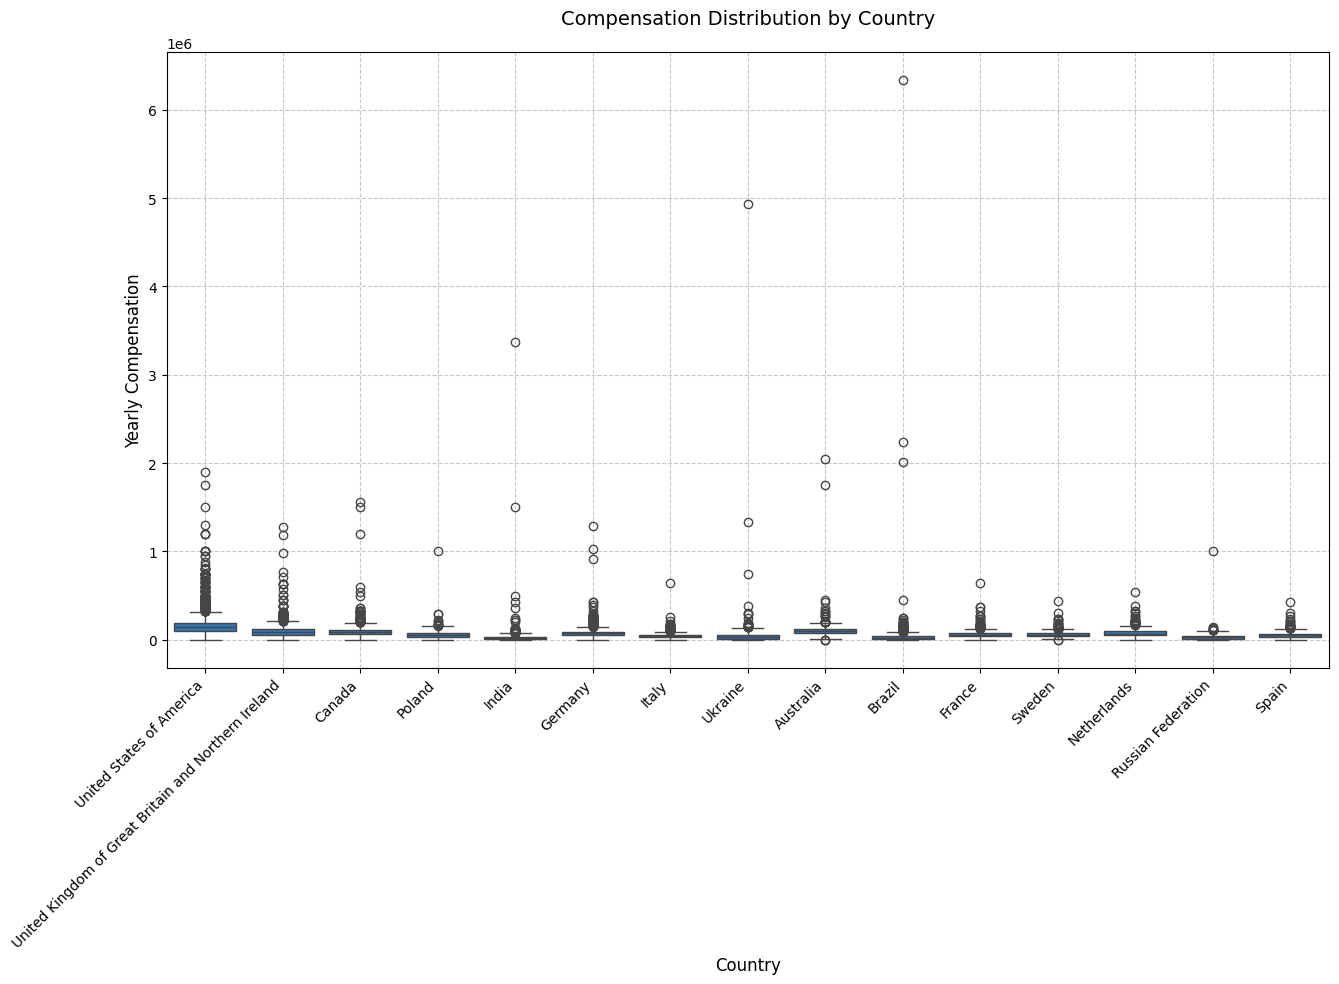

In [22]:
## Write your code here
def analyze_global_compensation(df, top_n=15):
    """
    Analyzes compensation distributions across countries
    """
    # Get top countries by number of respondents
    top_countries = df['Country'].value_counts().head(top_n).index
    country_data = df[df['Country'].isin(top_countries)]
    
    # Calculate statistics by country
    country_stats = country_data.groupby('Country')['ConvertedCompYearly'].agg([
        'median', 'mean', 'count', 'std'
    ]).sort_values('median', ascending=False)
    
    # Create box plot
    plt.figure(figsize=(15, 8))
    sns.boxplot(
        data=country_data,
        x='Country',
        y='ConvertedCompYearly',
        color='#1976D2'
    )
    
    plt.title('Compensation Distribution by Country', pad=20, fontsize=14)
    plt.xlabel('Country', fontsize=12)
    plt.ylabel('Yearly Compensation', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Display statistical summary
    html_content = f"""
    <style>
        .country-stats {{
            margin: 20px;
            padding: 15px;
            background-color: black;
            border-radius: 8px;
            font-family: Arial, sans-serif;
        }}
        .highlight {{
            color: #1976D2;
            font-weight: bold;
        }}
        table {{
            width: 100%;
            border-collapse: collapse;
            margin-top: 15px;
        }}
        th {{
            background-color: #1976D2;
            color: white;
            padding: 12px;
            text-align: left;
        }}
        td {{
            padding: 10px;
            border-bottom: 1px solid #ddd;
        }}
    </style>
    
    <div class='country-stats'>
        <h3>Global Compensation Analysis</h3>
        <p>Highest Median: <span class='highlight'>{country_stats.index[0]} (${country_stats.iloc[0]['median']:,.2f})</span></p>
        <p>Lowest Median: <span class='highlight'>{country_stats.index[-1]} (${country_stats.iloc[-1]['median']:,.2f})</span></p>
        <p>Countries Analyzed: <span class='highlight'>{len(country_stats)}</span></p>
        
        <h4>Detailed Country Statistics:</h4>
        {country_stats.round(2).to_html()}
    </div>
    """
    
    display(HTML(html_content))
    return country_stats

# Execute analysis
global_compensation_stats = analyze_global_compensation(df)

<h3>Step 6: Removing Outliers from the Dataset</h3>


**Task**: Create a new DataFrame by removing outliers from the `ConvertedCompYearly` column to get a refined dataset for correlation analysis.


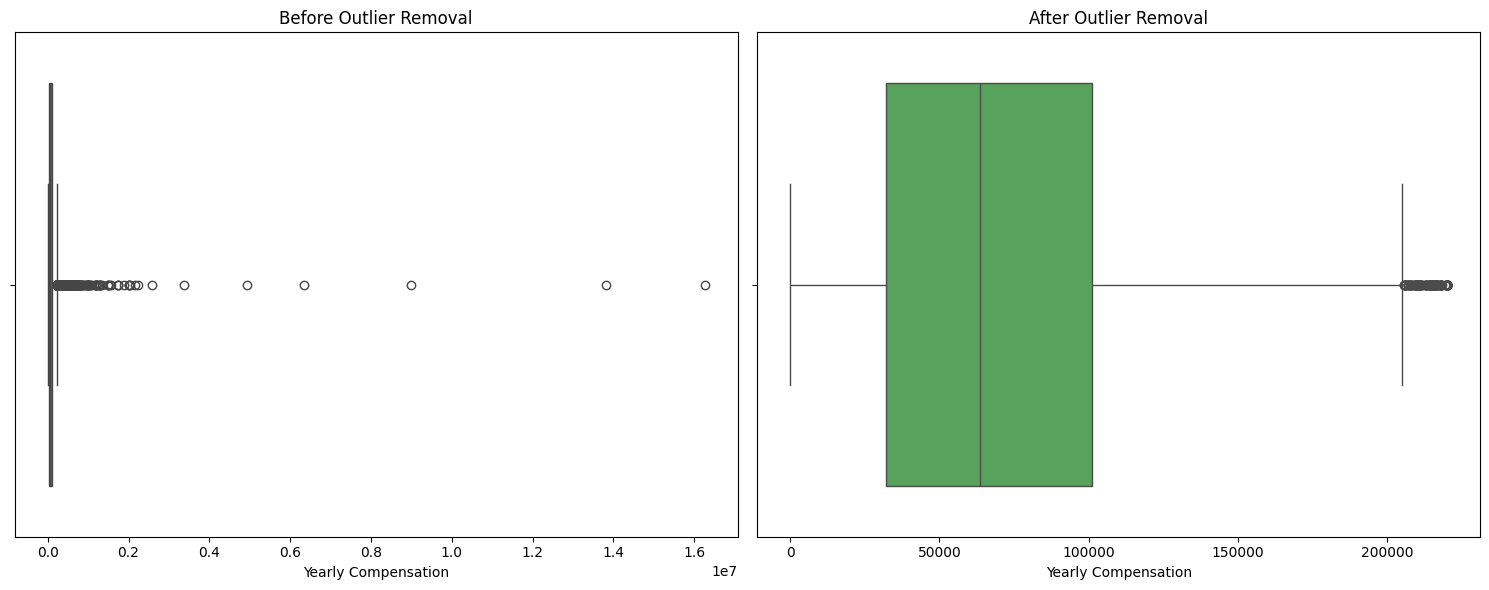

In [23]:
## Write your code here
def remove_compensation_outliers(df):
    """
    Creates clean dataset by removing compensation outliers using IQR method
    """
    # Calculate IQR bounds
    Q1 = df['ConvertedCompYearly'].quantile(0.25)
    Q3 = df['ConvertedCompYearly'].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Create clean dataset
    clean_df = df[
        (df['ConvertedCompYearly'] >= lower_bound) & 
        (df['ConvertedCompYearly'] <= upper_bound)
    ].copy()
    
    # Validate results
    html_content = f"""
    <style>
        .validation-stats {{
            margin: 20px;
            padding: 15px;
            background-color: black;
            border-radius: 8px;
            font-family: Arial, sans-serif;
        }}
        .highlight {{
            color: #1976D2;
            font-weight: bold;
        }}
    </style>
    
    <div class='validation-stats'>
        <h3>Dataset Cleaning Results</h3>
        <p>Original Size: <span class='highlight'>{len(df):,}</span></p>
        <p>Clean Size: <span class='highlight'>{len(clean_df):,}</span></p>
        <p>Removed Rows: <span class='highlight'>{len(df) - len(clean_df):,}</span></p>
        <p>Percentage Retained: <span class='highlight'>{(len(clean_df)/len(df)*100):.2f}%</span></p>
    </div>
    """
    
    display(HTML(html_content))
    
    # Visualize before and after distributions
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    sns.boxplot(x=df['ConvertedCompYearly'], ax=ax1, color='#1976D2')
    ax1.set_title('Before Outlier Removal')
    ax1.set_xlabel('Yearly Compensation')
    
    sns.boxplot(x=clean_df['ConvertedCompYearly'], ax=ax2, color='#4CAF50')
    ax2.set_title('After Outlier Removal')
    ax2.set_xlabel('Yearly Compensation')
    
    plt.tight_layout()
    
    return clean_df

# Execute cleaning
clean_dataset = remove_compensation_outliers(df)

<h3>Step 7: Finding Correlations Between Key Variables</h3>


**Task**: Calculate correlations between `ConvertedCompYearly`, `WorkExp`, and `JobSatPoints_1`. Visualize these correlations with a heatmap.


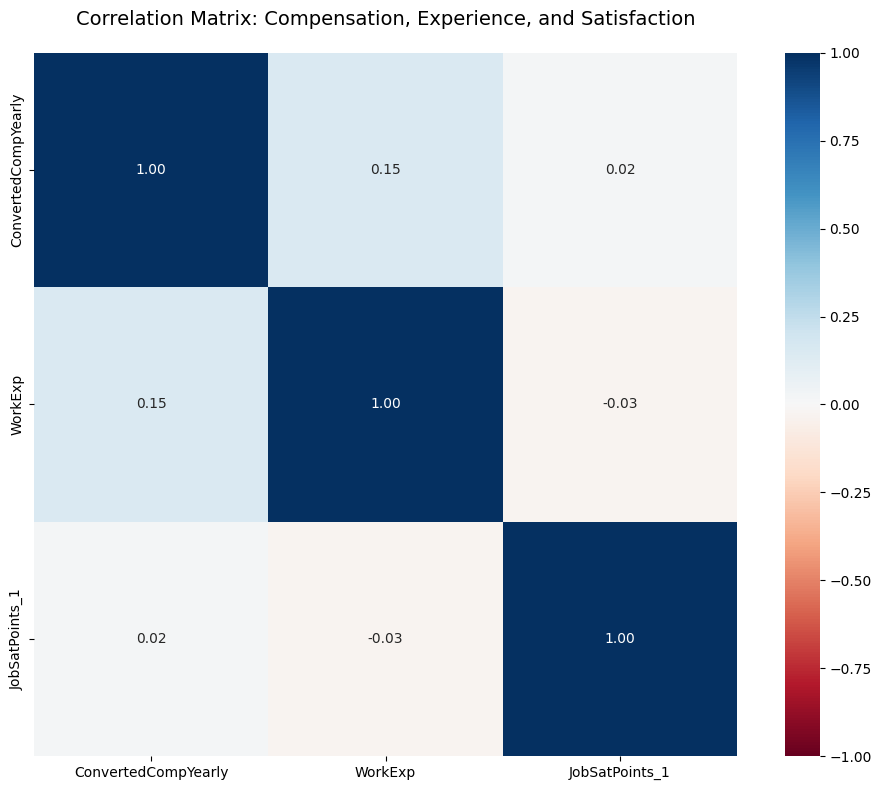

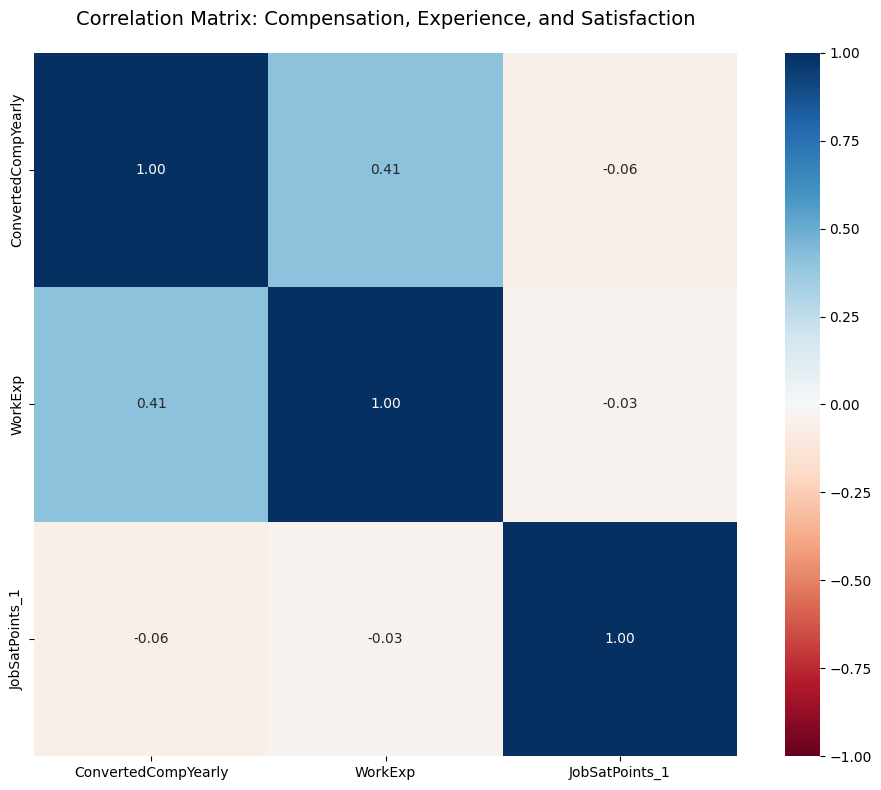

In [32]:
## Write your code here
def analyze_work_correlations(df):
    """
    Analyzes and visualizes correlations between compensation, experience, and job satisfaction
    """
    # Select relevant columns
    cols_of_interest = ['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1']
    correlation_data = df[cols_of_interest]
    
    # Calculate correlation matrix
    correlation_matrix = correlation_data.corr()
    
    # Create heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        correlation_matrix,
        annot=True,
        cmap='RdBu',
        center=0,
        fmt='.2f',
        square=True,
        vmin=-1,
        vmax=1
    )
    
    plt.title('Correlation Matrix: Compensation, Experience, and Satisfaction', pad=20, fontsize=14)
    plt.tight_layout()
    
    # Display insights
    html_content = f"""
    <style>
        .correlation-insights {{
            margin: 20px;
            padding: 15px;
            background-color: black;
            border-radius: 8px;
            font-family: Arial, sans-serif;
        }}
        .highlight {{
            color: #1976D2;
            font-weight: bold;
        }}
    </style>
    
    <div class='correlation-insights'>
        <h3>Key Correlation Insights</h3>
        <p>Compensation-Experience Correlation: <span class='highlight'>{correlation_matrix.iloc[0,1]:.3f}</span></p>
        <p>Compensation-Satisfaction Correlation: <span class='highlight'>{correlation_matrix.iloc[0,2]:.3f}</span></p>
        <p>Experience-Satisfaction Correlation: <span class='highlight'>{correlation_matrix.iloc[1,2]:.3f}</span></p>
    </div>
    """

    
    display(HTML(html_content))
    return correlation_matrix

# Execute analysis
correlation_results = analyze_work_correlations(df)
correlation_results = analyze_work_correlations(clean_dataset)

<h3>Step 8: Scatter Plot for Correlations</h3>


**Task**: Create scatter plots to examine specific correlations between `ConvertedCompYearly` and `WorkExp`, as well as between `ConvertedCompYearly` and `JobSatPoints_1`.


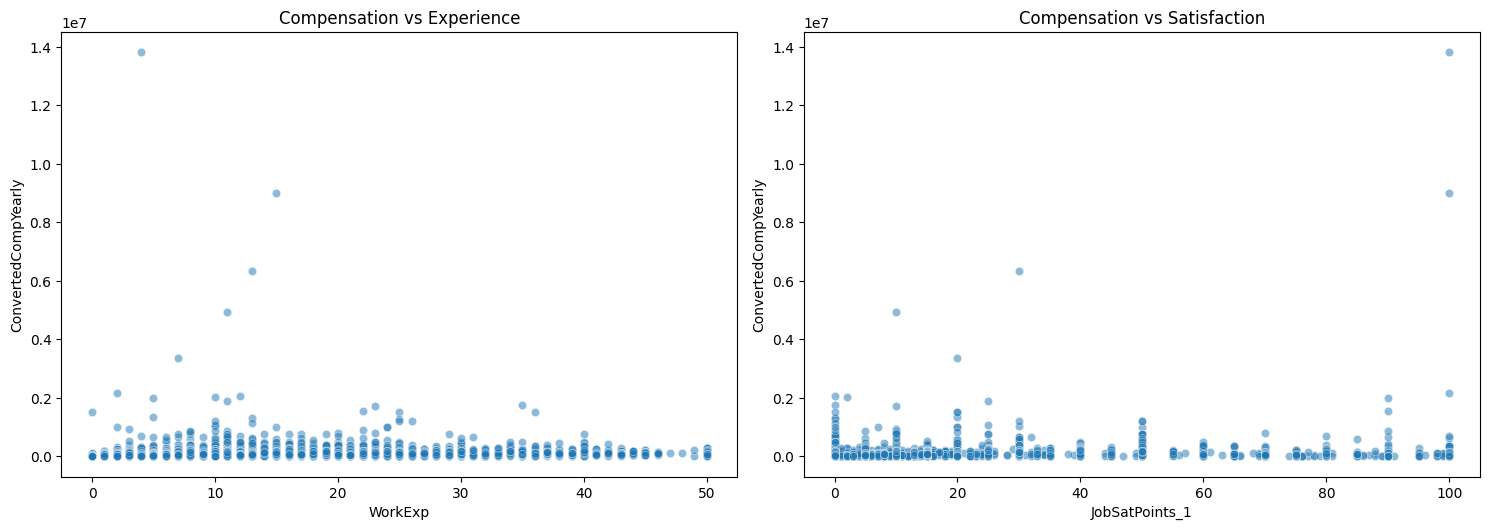

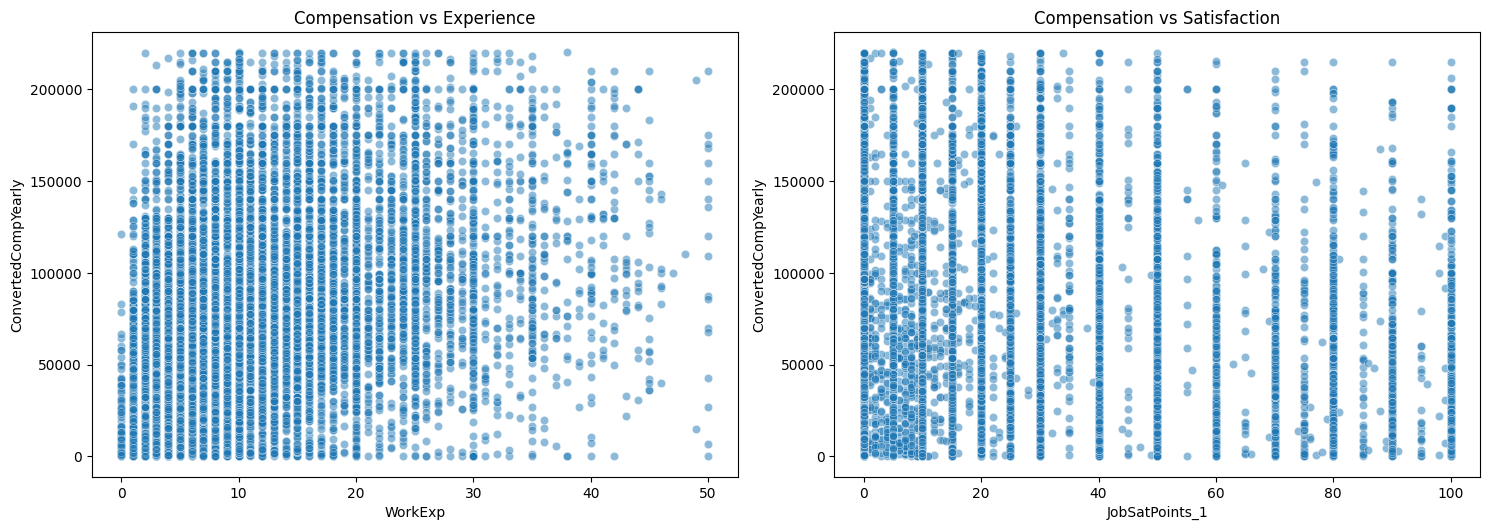

In [33]:
## Write your code here
def analyze_work_correlations(df):
    """
    Analyzes correlations with both heatmap and scatter plots
    """
    # Select relevant columns
    cols_of_interest = ['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1']
    correlation_data = df[cols_of_interest]
    
    # Create figure with subplots for heatmap and scatter plots
    fig = plt.figure(figsize=(15, 10))
    gs = fig.add_gridspec(2, 2)
    
    # Heatmap
    ax1 = fig.add_subplot(gs[0, 0])
    correlation_matrix = correlation_data.corr()
   
    sns.scatterplot(
        data=correlation_data,
        x='WorkExp',
        y='ConvertedCompYearly',
        alpha=0.5,
        ax=ax1
    )
    ax1.set_title('Compensation vs Experience')
    
    # Scatter plot: Compensation vs Satisfaction
    ax2 = fig.add_subplot(gs[0, 1])
    sns.scatterplot(
        data=correlation_data,
        x='JobSatPoints_1',
        y='ConvertedCompYearly',
        alpha=0.5,
        ax=ax2
    )
    ax2.set_title('Compensation vs Satisfaction')
    
   
    plt.tight_layout()
    
    # Display insights
    html_content = f"""
    <style>
        .correlation-insights {{
            margin: 20px;
            padding: 15px;
            background-color: black;
            border-radius: 8px;
            font-family: Arial, sans-serif;
        }}
        .highlight {{
            color: #1976D2;
            font-weight: bold;
        }}
    </style>
    
    <div class='correlation-insights'>
        <h3>Key Correlation Insights</h3>
        <p>Compensation-Experience Correlation: <span class='highlight'>{correlation_matrix.iloc[0,1]:.3f}</span></p>
        <p>Compensation-Satisfaction Correlation: <span class='highlight'>{correlation_matrix.iloc[0,2]:.3f}</span></p>
        <p>Experience-Satisfaction Correlation: <span class='highlight'>{correlation_matrix.iloc[1,2]:.3f}</span></p>
    </div>
    """
    
    display(HTML(html_content))
    return correlation_matrix, fig

# Execute analysis
correlation_results, visualization = analyze_work_correlations(df)
correlation_results, visualization = analyze_work_correlations(clean_dataset)


<h3>Summary</h3>


In this lab, you practiced essential skills in correlation analysis by:

- Examining the distribution of yearly compensation with histograms and box plots.
- Detecting and removing outliers from compensation data.
- Calculating correlations between key variables such as compensation, work experience, and job satisfaction.
- Visualizing relationships with scatter plots and heatmaps to gain insights into the associations between these features.

By following these steps, you have developed a solid foundation for analyzing relationships within the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
